In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rsot import RSOT, EntropicRSOT
from rsot import exact_rsot, exact_entreg_rsot, exact_entreg_rsot_primal
from rsot import calc_f_rsot, calc_g_rsot, calc_logB, calc_B
from sinkhorn import calc_U, calc_k_formula, robust_semisinkhorn_eps
from utils import norm_inf

import time

In [2]:
# Dimension
n = 100

# Regularization
tau = np.float64(1.0)

In [3]:
np.random.seed(3698)

# Cost matrix
C = np.random.uniform(low=1.0, high=50.0, size=(n, n)).astype(np.float64)
C = (C + C.T) / 2.0

# Marginal vectors
a = np.random.uniform(0.1, 1.0, size=n).astype(np.float64)
b = np.random.uniform(0.1, 1.0, size=n).astype(np.float64)

a = a / a.sum()
b = b / b.sum()

# Varying $\epsilon$

In [4]:
# Original UOT problem
rsot = RSOT(C, a, b, tau)

# Optimal solution
f_optimal, X_optimal = exact_rsot(rsot)

print('Optimal:', f_optimal)

Optimal: 4.283035963992407


Epsilon 0: 0.1
0 1.0000000000000002
1000 4.283047395420552


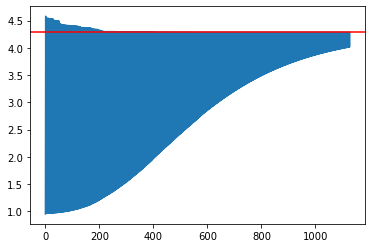

Time elapsed: 0.5784304141998291
Epsilon 1: 0.0727895384398315
0 1.0000000000000002
1000 4.2830417276559185


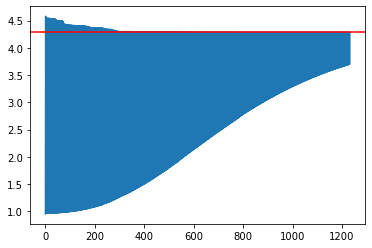

Time elapsed: 0.6693823337554932
Epsilon 2: 0.05298316906283707
0 1.0000000000000002
1000 4.284494548079795


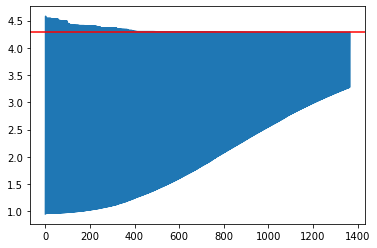

Time elapsed: 0.6995382308959961
Epsilon 3: 0.03856620421163472
0 1.0000000000000002
1000 4.289789999665427


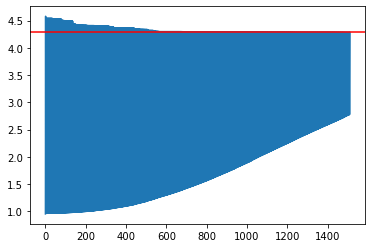

Time elapsed: 0.8132741451263428
Epsilon 4: 0.02807216203941177
0 1.0000000000000002
1000 4.296370341928009


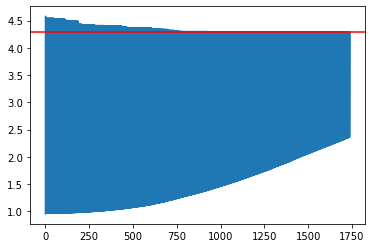

Time elapsed: 0.7938206195831299
Epsilon 5: 0.020433597178569417
0 1.0000000000000002
1000 4.318847525299487
2000 4.2857217552114655


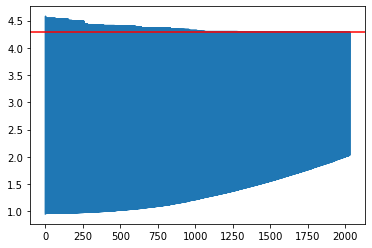

Time elapsed: 0.8912372589111328
Epsilon 6: 0.014873521072935119
0 1.0000000000000002
1000 4.367166214774023
2000 4.296369900757854


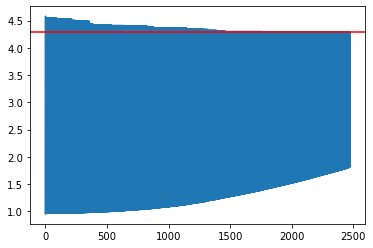

Time elapsed: 1.0885295867919922
Epsilon 7: 0.010826367338740546
0 1.0000000000000002
1000 4.397522967577384
2000 4.302002229625746
3000 4.294646519747051
4000 4.285346313030036


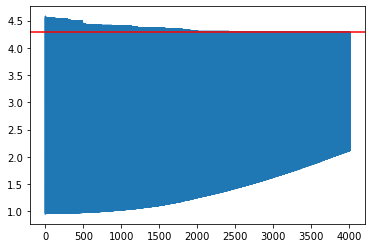

Time elapsed: 1.703000545501709
Epsilon 8: 0.007880462815669913
0 1.0000000000000002
1000 4.413680768690236
2000 4.36666239252121
3000 4.297883111062804
4000 4.295688323503541
5000 4.2884066448139375


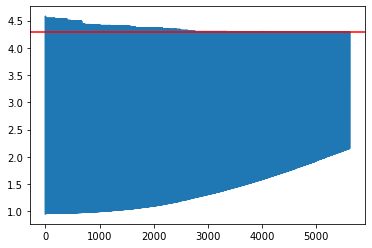

Time elapsed: 2.3387553691864014
Epsilon 9: 0.005736152510448681
0 1.0000000000000002
1000 4.431416820943843
2000 4.397522886854675
3000 4.343487084453112
4000 4.297883086811616
5000 4.296369749576008
6000 4.293818305932421
7000 4.287092941637258


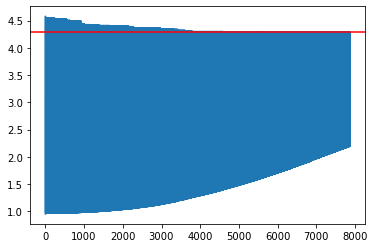

Time elapsed: 3.346794605255127
Epsilon 10: 0.0041753189365604
0 1.0000000000000002
1000 4.4934327281860975
2000 4.408157370168601
3000 4.388354991133737
4000 4.366503813540344
5000 4.309353078951075
6000 4.297883073816565
7000 4.296369736524346
8000 4.293818291991559
9000 4.28978820686698
10000 4.285694240753988


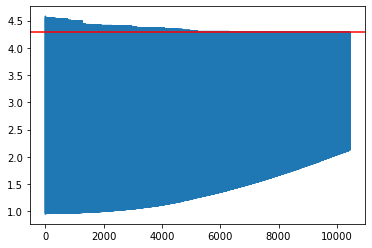

Time elapsed: 4.265038967132568
Epsilon 11: 0.0030391953823131978
0 1.0000000000000002
1000 4.526651324400913
2000 4.425193769387041
3000 4.408157368645723
4000 4.396334068919871
5000 4.367166011631524
6000 4.338924337677501
7000 4.303324492020839
8000 4.297883066934086
9000 4.296369729506638
10000 4.296369729506972
11000 4.2938182833037
12000 4.289807431341568
13000 4.287094325814338
14000 4.285694230991391


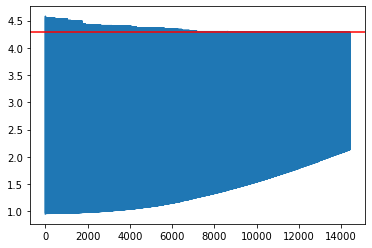

Time elapsed: 5.619948863983154
Epsilon 12: 0.00221221629107045
0 1.0000000000000002
1000 4.5332669510241015
2000 4.493432726044622
3000 4.419559956200105
4000 4.408157367859024
5000 4.397522944508594
6000 4.367166069518723
7000 4.367166009817828
8000 4.343486947495196
9000 4.318846266938316
10000 4.297883063243785
11000 4.297883063243145
12000 4.2963697257474545
13000 4.296369725747639
14000 4.296369725744893
15000 4.293818279023945
16000 4.293818278981201
17000 4.289788193813292
18000 4.287092908439589
19000 4.285694225767784
20000 4.285318447639604
21000 4.285227014040848


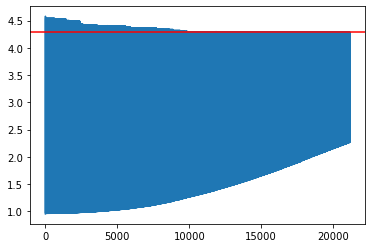

Time elapsed: 8.443800926208496
Epsilon 13: 0.0016102620275609393
0 1.0000000000000002
1000 4.533266950736022
2000 4.502528996200631
3000 4.490196595953639
4000 4.425070763254638
5000 4.408157389292513
6000 4.399512928761467
7000 4.397522944066104
8000 4.384619680016019
9000 4.367166008855872
10000 4.366503796924535
11000 4.34348694465679
12000 4.33672943603356
13000 4.309352966030516
14000 4.297883061269348
15000 4.297883061266984
16000 4.297883061273076
17000 4.296369723739612
18000 4.296369723736621
19000 4.296369723737274
20000 4.2950000701755915
21000 4.2938182767294295
22000 4.293818276733571
23000 4.2897881913832245
24000 4.289788191386108
25000 4.287092905677968
26000 4.285694222981841
27000 4.285318586804271
28000 4.285227067481314
29000 4.285227011771726
30000 4.284523250480119


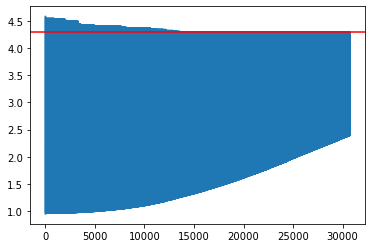

Time elapsed: 11.855994701385498
Epsilon 14: 0.0011721022975334804
0 1.0000000000000002
1000 4.540751927113381
2000 4.533266950585696
3000 4.501603038232678
4000 4.490200898515676
5000 4.425194594482809
6000 4.414345477715406
7000 4.408157367220033
8000 4.408157367216471
9000 4.3975229438368455
10000 4.396334168114177
11000 4.384619672500954
12000 4.367166008343619
13000 4.367166008346773
14000 4.366503659447346
15000 4.343486943471333
16000 4.33892432926347
17000 4.31884626389697
18000 4.303325392385243
19000 4.297883060214122
20000 4.297883060220396
21000 4.297883060216451
22000 4.297883060218208
23000 4.2963697226620505
24000 4.296369722663446
25000 4.2963697226674205
26000 4.296369722662682
27000 4.295074929025035
28000 4.293818275534573
29000 4.293818275536879
30000 4.2938182755328596
31000 4.293818275444666
32000 4.289788190092558
33000 4.289788190088287
34000 4.2870929042170705
35000 4.285694221491647
36000 4.2856942215019425
37000 4.2853185985602815
38000 4.285261572816025
3900

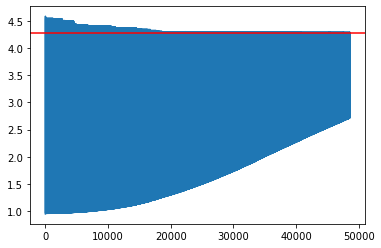

Time elapsed: 18.438678741455078
Epsilon 15: 0.0008531678524172806
0 1.0000000000000002
1000 4.540751927028873
2000 4.533266950505521
3000 4.526651323201609
4000 4.501603038122075
5000 4.49343272533731
6000 4.489081638466504
7000 4.425193344355085
8000 4.419556459947534
9000 4.413682065389545
10000 4.408157367103545
11000 4.4081573670982115
12000 4.397522943710342
13000 4.39752294370726
14000 4.396334067301067
15000 4.384619672451002
16000 4.367166008073283
17000 4.367166008076237
18000 4.3671660080664605
19000 4.366503659228703
20000 4.343486942912616
21000 4.343486942892955
22000 4.338924328705775
23000 4.3190642677739
24000 4.318846263331131
25000 4.302994676661582
26000 4.2978830596513955
27000 4.297883059660558
28000 4.297883059662099
29000 4.297883059649687
30000 4.297883059661201
31000 4.2963697220812085
32000 4.296369722085902
33000 4.296369722095456
34000 4.296369722094385
35000 4.2963697220840285
36000 4.296369722090708
37000 4.2950765288872015
38000 4.2949999479144125
39000 

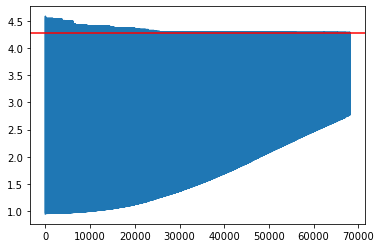

Time elapsed: 25.626169443130493
Epsilon 16: 0.0006210169418915617
0 1.0000000000000002
1000 4.5407519269837255
2000 4.5407519269894925
3000 4.533266950458568
4000 4.526651323185127
5000 4.526651323152345
6000 4.493432725270789
7000 4.493432725281531
8000 4.490196593527466
9000 4.439136164549659
10000 4.425176338281992
11000 4.41955645988437
12000 4.413682065307689
13000 4.408157367040152
14000 4.408157367034713
15000 4.408157367039637
16000 4.399170094807841
17000 4.3975229436514764
18000 4.397522943644491
19000 4.396334067223847
20000 4.38835489995958
21000 4.384619672180458
22000 4.367166007933949
23000 4.367166007916894
24000 4.367166007927786
25000 4.367166007930136
26000 4.366503655829041
27000 4.366503653571648
28000 4.343486942590534
29000 4.34335834560522
30000 4.338924328409288
31000 4.336729434113584
32000 4.318846263042049
33000 4.31884626302668
34000 4.303325391517754
35000 4.302023164706587
36000 4.297883059358201
37000 4.297883059359272
38000 4.2978830593573
39000 4.2978

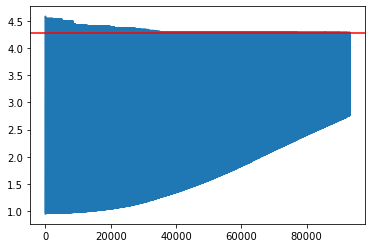

Time elapsed: 35.55421328544617
Epsilon 17: 0.00045203536563602454
0 1.0000000000000002
1000 4.540751926959561
2000 4.5407519269528525
3000 4.540751926963608
4000 4.5332669504465715
5000 4.533266950427386
6000 4.526651323130189
7000 4.526572936773395
8000 4.501603038038853
9000 4.493432725237485
10000 4.493432725241996
11000 4.4901965934872505
12000 4.439136164518827
13000 4.425193329107562
14000 4.42507076183009
15000 4.419556459868555
16000 4.413682065279319
17000 4.413682065271036
18000 4.408157367003929
19000 4.408157367016741
20000 4.408157367004048
21000 4.408157367010663
22000 4.399170094779901
23000 4.397522943614636
24000 4.397522943627418
25000 4.397522943608594
26000 4.396334067196562
27000 4.396334067191572
28000 4.384619681792962
29000 4.367217888427472
30000 4.367166007842002
31000 4.367166007853791
32000 4.36716600784268
33000 4.367166007839563
34000 4.367166007842825
35000 4.366503944976895
36000 4.366503653491689
37000 4.366503653407654
38000 4.343486942436659
39000 4.

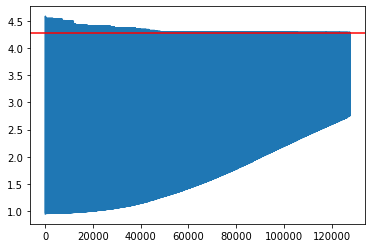

Time elapsed: 48.303414821624756
Epsilon 18: 0.00032903445623126676
0 1.0000000000000002
1000 4.540751926942811
2000 4.540751926922535
3000 4.540751926947311
4000 4.540751926934497
5000 4.533266950425078
6000 4.533266950423302
7000 4.533266950432402
8000 4.526651323101795
9000 4.526651323122866
10000 4.501603038010452
11000 4.501603038020265
12000 4.493432725224238
13000 4.493432725230875
14000 4.49343272522961
15000 4.490196593469491
16000 4.489080783871821
17000 4.439136164496512
18000 4.425193317898142
19000 4.425070771255261
20000 4.425070761811885
21000 4.417949536572738
22000 4.413682065256544
23000 4.413682065251973
24000 4.4136820652544655
25000 4.408157366974251
26000 4.40815736698444
27000 4.408157366968027
28000 4.408157366970536
29000 4.404862744258876
30000 4.399170094759848
31000 4.399170094747669
32000 4.397522943594948
33000 4.397522943581229
34000 4.397522943589599
35000 4.397522943596795
36000 4.396334067174726
37000 4.396334067187398
38000 4.388354899899081
39000 4.3

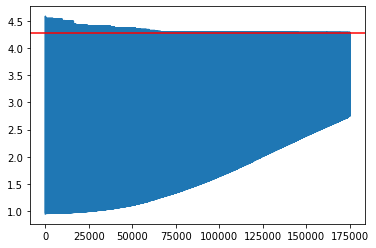

Time elapsed: 66.8804543018341
Epsilon 19: 0.0002395026619987486
0 1.0000000000000002
1000 4.540751926971113
2000 4.540751926965634
3000 4.540751926961958
4000 4.540751926943159
5000 4.5407519269404695
6000 4.533266950427217
7000 4.53326695040843
8000 4.533266950409495
9000 4.53326695040671
10000 4.533250825947834
11000 4.526651323121148
12000 4.526651323104578
13000 4.526651323086344
14000 4.501603037996463
15000 4.501603038001022
16000 4.493432725215049
17000 4.49343272521472
18000 4.493432725210096
19000 4.4934327252248645
20000 4.490196593454749
21000 4.490196593482534
22000 4.48908078386694
23000 4.439136164484448
24000 4.425197501992219
25000 4.425193317849289
26000 4.425080224870083
27000 4.425070761779594
28000 4.419556459820892
29000 4.4179495365490125
30000 4.413682065251873
31000 4.413682065263863
32000 4.413682065244169
33000 4.413682065226296
34000 4.408157367001981
35000 4.408157366972097
36000 4.408157366974903
37000 4.408157366989588
38000 4.408157366977529
39000 4.4081

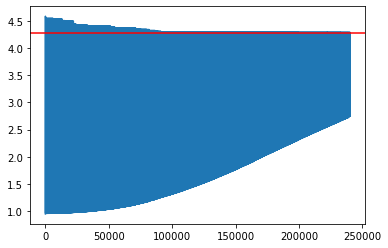

Time elapsed: 92.77764225006104
Epsilon 20: 0.00017433288221999874
0 1.0000000000000002
1000 4.540751926902876
2000 4.540751926946965
3000 4.540751926953382
4000 4.540751926932808
5000 4.540751926945831
6000 4.54075192691624
7000 4.54075192695096
8000 4.5407519269470145
9000 4.533266950393629
10000 4.53326695040612
11000 4.53326695045209
12000 4.533266950426364
13000 4.533266950414374
14000 4.526651323085398
15000 4.526651323129192
16000 4.526651323086632
17000 4.526651323085218
18000 4.52665132310761
19000 4.501603038008071
20000 4.501603037996584
21000 4.493432725377181
22000 4.493432725209357
23000 4.493432725202896
24000 4.493432725223756
25000 4.493432725250889
26000 4.493432725233936
27000 4.490196593487471
28000 4.490196593476922
29000 4.490196593484246
30000 4.489080783881896
31000 4.439136164481393
32000 4.439136164475571
33000 4.425194292293742
34000 4.425193317820186
35000 4.425193317800673
36000 4.425070761784231
37000 4.425070761794654
38000 4.419556459819064
39000 4.41955

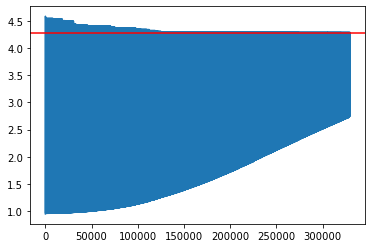

Time elapsed: 127.36023330688477
Epsilon 21: 0.0001268961003167922
0 1.0000000000000002
1000 4.540751926940444
2000 4.540751926920976
3000 4.540751926964546
4000 4.540751926938884
5000 4.5407519269263
6000 4.540751926921635
7000 4.540751926946285
8000 4.540751926939558
9000 4.540751926933537
10000 4.540751926924497
11000 4.540751926932207
12000 4.533266950419622
13000 4.533266950402804
14000 4.533266950425701
15000 4.5332669503960945
16000 4.533266950424112
17000 4.533266950427085
18000 4.533266950418024
19000 4.526651324277878
20000 4.526651323087967
21000 4.526651323076465
22000 4.526651323073314
23000 4.526651323070527
24000 4.526651323101991
25000 4.50252979546045
26000 4.501603038009651
27000 4.5016030380141645
28000 4.501603037987145
29000 4.493432725201375
30000 4.493432725190304
31000 4.493432725207447
32000 4.493432725206548
33000 4.49343272521597
34000 4.493432725196902
35000 4.493432725198997
36000 4.493432725202916
37000 4.490196593457021
38000 4.490196593466644
39000 4.490

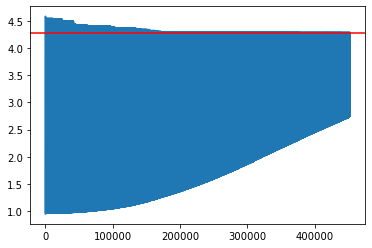

Time elapsed: 172.92040586471558
Epsilon 22: 9.236708571873866e-05
0 1.0000000000000002
1000 4.540751926899737
2000 4.540751926951256
3000 4.5407519269161
4000 4.540751926963832
5000 4.54075192700679
6000 4.540751926984937
7000 4.540751926918934
8000 4.540751926935731
9000 4.540751926889753
10000 4.54075192690479
11000 4.540751926860718
12000 4.5407519270037175
13000 4.540751926986421
14000 4.540751926991098
15000 4.540751926971651
16000 4.533266950467295
17000 4.53326695039092
18000 4.533266950426917
19000 4.533266950413663
20000 4.5332669504374765
21000 4.533266950413618
22000 4.533266950449457
23000 4.53326695047248
24000 4.533266950379367
25000 4.533266950436589
26000 4.526655028920927
27000 4.526651323073613
28000 4.526651323113184
29000 4.526651323105925
30000 4.526651323069549
31000 4.5266513231127945
32000 4.526651323061119
33000 4.52665132316028
34000 4.52665132315185
35000 4.502529795463109
36000 4.501603038005181
37000 4.501603037995575
38000 4.5016030380179215
39000 4.50160

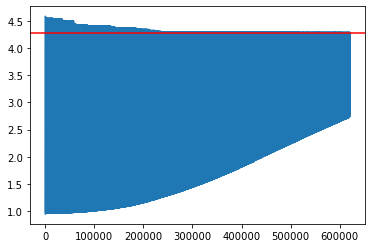

Time elapsed: 235.4618582725525
Epsilon 23: 6.723357536499335e-05
0 1.0000000000000002
1000 4.540751927009745
2000 4.540751927034361
3000 4.540751926957172
4000 4.540751926902734
5000 4.540751926918431
6000 4.540751926875323
7000 4.540751926950389
8000 4.540751926906741
9000 4.540751926987673
10000 4.540751926911691
11000 4.540751926950824
12000 4.540751926951129
13000 4.540751926934875
14000 4.540751926967908
15000 4.540751927054102
16000 4.540751926861432
17000 4.540751926927995
18000 4.540751926985276
19000 4.540751926937482
20000 4.540751926955374
21000 4.540751926906378
22000 4.533266950490249
23000 4.5332669504009475
24000 4.533266950459973
25000 4.533266950403869
26000 4.533266950470385
27000 4.5332669504964205
28000 4.533266950438133
29000 4.533266950318187
30000 4.533266950372122
31000 4.533266950429053
32000 4.533266950458335
33000 4.533266950389756
34000 4.533266950407681
35000 4.533266950452508
36000 4.526651323113255
37000 4.526651323107188
38000 4.5266513231575765
39000 4

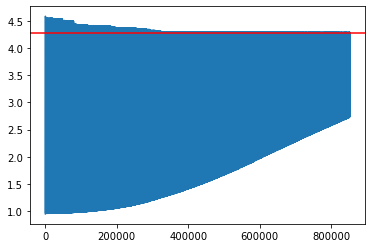

Time elapsed: 326.1654803752899
Epsilon 24: 4.893900918477499e-05
0 1.0000000000000002
1000 4.540751926969003
2000 4.540751926886035
3000 4.54075192683325
4000 4.540751927079746
5000 4.540751926966046
6000 4.540751926915353
7000 4.54075192692538
8000 4.540751926961924
9000 4.540751926906702
10000 4.540751926936509
11000 4.540751926954127
12000 4.540751926871355
13000 4.54075192701909
14000 4.540751927013009
15000 4.5407519270200165
16000 4.540751926892925
17000 4.54075192684915
18000 4.540751926929421
19000 4.540751926872632
20000 4.5407519269719385
21000 4.540751926981281
22000 4.540751927007833
23000 4.540751926766593
24000 4.540751926795912
25000 4.540751926972609
26000 4.540751926891177
27000 4.540751926933939
28000 4.540751926810673
29000 4.540751926903485
30000 4.533266950429966
31000 4.533266950374164
32000 4.533266950396539
33000 4.533266950491379
34000 4.533266950247426
35000 4.533266950393914
36000 4.533266950350883
37000 4.533266950336025
38000 4.533266950391608
39000 4.5332

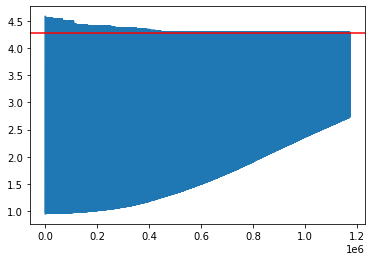

Time elapsed: 456.13010692596436
Epsilon 25: 3.5622478902624444e-05
0 1.0000000000000002
1000 4.540751926972504
2000 4.540751926982859
3000 4.540751926883393
4000 4.540751926852019
5000 4.54075192691829
6000 4.540751926818772
7000 4.5407519270437655
8000 4.540751926791881
9000 4.540751927023694
10000 4.540751926867071
11000 4.54075192692387
12000 4.540751926745762
13000 4.540751926800898
14000 4.5407519269476
15000 4.540751927022281
16000 4.540751926978987
17000 4.54075192696927
18000 4.540751926868327
19000 4.540751926954524
20000 4.540751926904251
21000 4.540751926881329
22000 4.54075192681286
23000 4.540751926808342
24000 4.540751926833934
25000 4.540751926983213
26000 4.540751927033236
27000 4.540751926715318
28000 4.540751926995239
29000 4.540751926979331
30000 4.540751927003049
31000 4.540751926868128
32000 4.540751927016947
33000 4.540751926863786
34000 4.540751926785454
35000 4.5407519270186905
36000 4.540751926923214
37000 4.54075192692163
38000 4.540751926984212
39000 4.54075

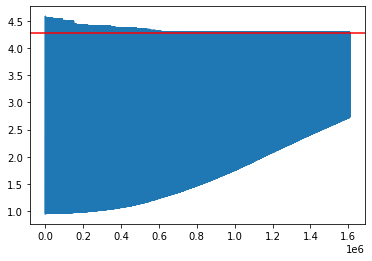

Time elapsed: 618.3553912639618
Epsilon 26: 2.592943797404667e-05
0 1.0000000000000002
1000 4.540751926901386
2000 4.54075192673324
3000 4.540751926814117
4000 4.540751926784092
5000 4.540751926857031
6000 4.540751926860035
7000 4.540751926676143
8000 4.540751926937476
9000 4.54075192680664
10000 4.540751926708591
11000 4.540751926890399
12000 4.540751926859618
13000 4.540751926698419
14000 4.540751927054481
15000 4.540751926966261
16000 4.540751926756884
17000 4.54075192687765
18000 4.540751926804446
19000 4.540751926817972
20000 4.540751927016476
21000 4.540751927007123
22000 4.540751926587484
23000 4.540751926525801
24000 4.540751926691273
25000 4.540751927108599
26000 4.540751927117506
27000 4.540751926960128
28000 4.540751927008641
29000 4.540751926801194
30000 4.540751927065173
31000 4.540751926931026
32000 4.5407519272032735
33000 4.5407519268573
34000 4.540751926844859
35000 4.54075192672485
36000 4.540751927115559
37000 4.5407519269570225
38000 4.540751926993305
39000 4.540751

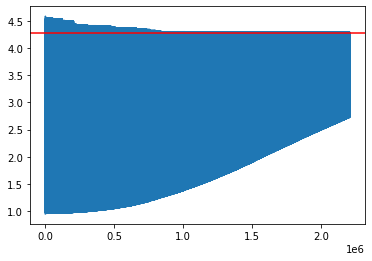

Time elapsed: 848.6302835941315
Epsilon 27: 1.8873918221350995e-05
0 1.0000000000000002
1000 4.542335262242311
2000 4.540751927002216
3000 4.540751926613447
4000 4.540751926569553
5000 4.540751927085036
6000 4.540751927046862
7000 4.5407519269201595
8000 4.540751926833811
9000 4.540751926921313
10000 4.540751926840701
11000 4.540751926786295
12000 4.540751926796859
13000 4.540751926962682
14000 4.540751926965749
15000 4.540751926998905
16000 4.54075192699433
17000 4.540751926701285
18000 4.54075192713033
19000 4.540751926773633
20000 4.54075192670884
21000 4.540751926586082
22000 4.540751926924803
23000 4.540751926596435
24000 4.540751927234328
25000 4.54075192683057
26000 4.540751926834231
27000 4.540751926640308
28000 4.540751926585694
29000 4.540751926922418
30000 4.5407519267595315
31000 4.540751926926716
32000 4.540751926782352
33000 4.540751926878135
34000 4.540751926513388
35000 4.540751926810375
36000 4.540751927050828
37000 4.540751927000955
38000 4.540751927124459
39000 4.540

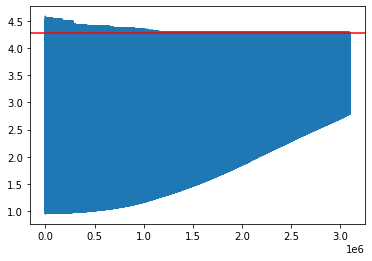

Time elapsed: 1213.0073835849762
Epsilon 28: 1.3738237958832637e-05
0 1.0000000000000002
1000 4.542335262291504
2000 4.54075192701321
3000 4.5407519265320095
4000 4.5407519268392456
5000 4.540751926365253
6000 4.540751926727051
7000 4.540751927375192
8000 4.540751927141653
9000 4.540751927037901
10000 4.540751926435508
11000 4.54075192691809
12000 4.540751927204983
13000 4.540751927045364
14000 4.540751926871097
15000 4.540751927197361
16000 4.540751926904092
17000 4.540751926763835
18000 4.540751926527245
19000 4.540751927046445
20000 4.540751927326324
21000 4.540751927063543
22000 4.540751926569199
23000 4.540751927130339
24000 4.540751927115492
25000 4.540751926743431
26000 4.540751926918467
27000 4.540751926856585
28000 4.540751926685486
29000 4.540751926991994
30000 4.54075192658925
31000 4.54075192709351
32000 4.540751926570741
33000 4.540751926864166
34000 4.540751927117937
35000 4.540751927025507
36000 4.5407519270400565
37000 4.540751926706747
38000 4.540751926757594
39000 4.5

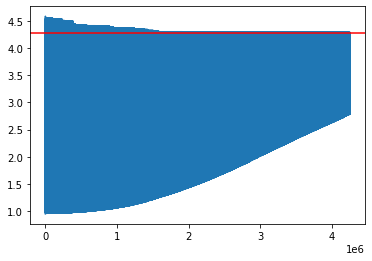

Time elapsed: 1626.468586921692
Epsilon 29: 1e-05
0 1.0000000000000002
1000 4.54233526201672
2000 4.542335262594321
3000 4.540751926684872
4000 4.540751927011388
5000 4.540751927280936
6000 4.540751927330023
7000 4.540751925907266
8000 4.540751926949991
9000 4.540751926827689
10000 4.540751927345778
11000 4.540751926644473
12000 4.540751926751353
13000 4.540751926767985
14000 4.540751927172345
15000 4.540751927202021
16000 4.540751926382453
17000 4.540751926593144
18000 4.540751926603703
19000 4.5407519267685945
20000 4.540751927063311
21000 4.540751927034028
22000 4.540751926852651
23000 4.540751926184319
24000 4.540751926959338
25000 4.540751926643293
26000 4.540751926751846
27000 4.540751926759312
28000 4.540751926672992
29000 4.540751927200135
30000 4.540751926391948
31000 4.540751926647568
32000 4.54075192649167
33000 4.540751926520418
34000 4.540751926663028
35000 4.540751926204918
36000 4.540751926421773
37000 4.540751926738166
38000 4.540751926766211
39000 4.540751926326482
400

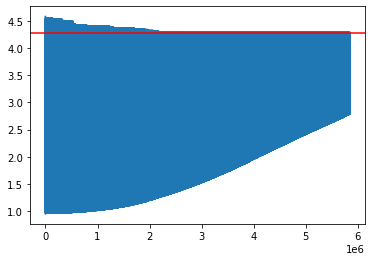

Time elapsed: 2266.965590238571


In [18]:
# Number of eps
neps = 30

# Epsilons
eps_arr = np.logspace(start=-1, stop=-5, num=neps).astype(np.float64)

kfs, kcs = np.zeros((2, neps))

for i, eps in enumerate(eps_arr):
    print(f'Epsilon {i}:', eps)
    start = time.time()

    # Entropic regularization parameter
    U = calc_U(rsot, eps)
    eta = eps / U

    # Convert to Entropic Regularized UOT
    ersot = EntropicRSOT(C, a, b, tau, eta)

    # Sinkhorn
    _, log = robust_semisinkhorn_eps(ersot, f_optimal, eps, 
                                     patience=1000,
                                     save_uv=False, verbose=True)
    
    plt.plot(log['f'][1:])
    plt.axhline(f_optimal, color='red')
    plt.show()

    # Find k
    kfs[i] = calc_k_formula(ersot, eps)
    kcs[i] = len(log['f']) - 1000

    print('Time elapsed:', time.time() - start)
    print('=================')

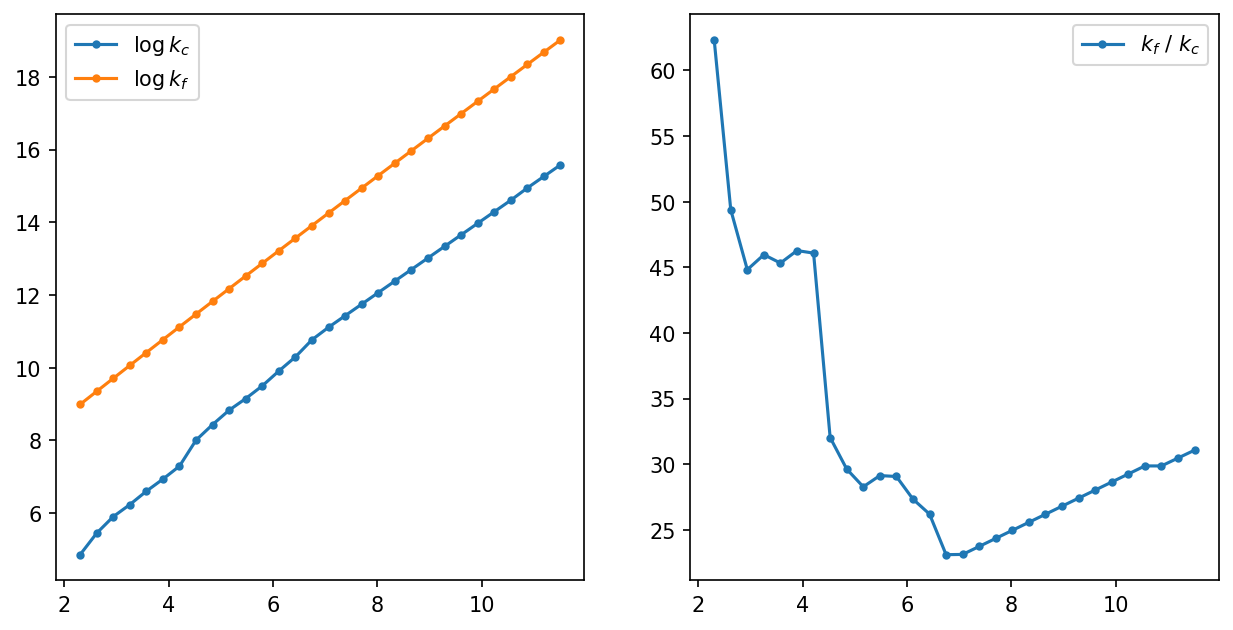

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=150)

ax[0].plot(np.log(1 / eps_arr), np.log(kcs), marker='.', label='$\log k_c$')
ax[0].plot(np.log(1 / eps_arr), np.log(kfs), marker='.', label='$\log k_f$')
ax[0].legend()

ax[1].plot(np.log(1 / eps_arr), kfs / kcs, marker='.', label='$k_f$ / $k_c$')
ax[1].legend()

# Theory checking

In [4]:
# Original UOT problem
rsot = RSOT(C, a, b, tau)

# Optimal solution
_, X_hat = exact_rsot(rsot)

print('Optimal:', calc_f_rsot(rsot, X_hat))

Optimal: 4.283035963992407


In [5]:
eps = 0.001

# Entropic regularization parameter
U = calc_U(rsot, eps)
eta = eps / U

# Convert to Entropic Regularized UOT
ersot = EntropicRSOT(C, a, b, tau, eta)

In [6]:
_, X_star = exact_entreg_rsot_primal(ersot)
print('Optimal:', calc_f_rsot(rsot, X_star), calc_g_rsot(ersot, X_star))

Optimal: 4.283035091451808 4.2826175557571196


In [16]:
_, u_star, v_star = exact_entreg_rsot(ersot, verbose=True)
X_star = calc_B(ersot, u_star, v_star)
print('Optimal:', calc_f_rsot(rsot, X_star), calc_g_rsot(ersot, X_star))

                                     CVXPY                                     
                                    v1.1.17                                    
(CVXPY) Dec 29 12:39:55 AM: Your problem has 200 variables, 0 constraints, and 0 parameters.
(CVXPY) Dec 29 12:39:55 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 29 12:39:55 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 29 12:39:55 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 29 12:39:55 AM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 29 12:39:55 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

SolverError: Solver 'ECOS' failed. Try another solver, or solve with verbose=True for more information.

In [7]:
f_optimal = calc_f_rsot(rsot, X_hat)

In [8]:
print(f'Epsilon:', eps)
start = time.time()

# Sinkhorn
_, log = robust_semisinkhorn_eps(ersot, f_optimal, eps, 
                                    patience=1000, verbose=True)

print('Time elapsed:', time.time() - start)

Epsilon: 0.001
0 1.0000000000000002
1000 4.540751927067053
2000 4.533266950542279
3000 4.526651323238954
4000 4.493432725385029
5000 4.4901965936248365
6000 4.425193353698843
7000 4.415137912541266
8000 4.408213379477106
9000 4.4081573671473535
10000 4.399170094928642
11000 4.397522943767497
12000 4.396334067347427
13000 4.384619672303177
14000 4.367166008188156
15000 4.367166008186874
16000 4.3665037435381375
17000 4.3665036541917175
18000 4.3434853968870994
19000 4.338924328946089
20000 4.31884626357085
21000 4.303325396034219
22000 4.297883059895104
23000 4.297883059893514
24000 4.2978830598982185
25000 4.297883059895984
26000 4.297883059894169
27000 4.2963697223350374
28000 4.296369722336594
29000 4.296369722333226
30000 4.296369722326216
31000 4.296369722327471
32000 4.2950749273820055
33000 4.2938182751615885
34000 4.293818275160781
35000 4.293818275164327
36000 4.29381827515827
37000 4.28978818968004
38000 4.289788189689421
39000 4.289788189683159
40000 4.287092903764945
41000 4

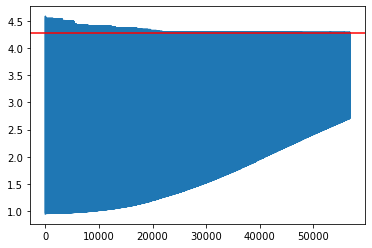

In [9]:
plt.plot(log['f'][1:])
plt.axhline(f_optimal, color='red')
plt.show()

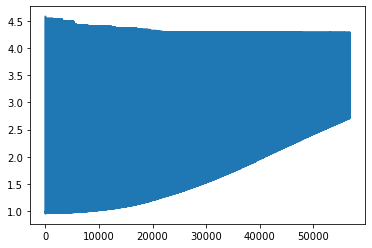

In [28]:
y = []

for uk, vk in zip(log['u'], log['v']):
    Xk = calc_B(ersot, uk, vk)
    # y.append(norm_inf(Xk - X_hat))
    y.append(calc_g_rsot(ersot, Xk))

plt.plot(y)